In [1]:
#loading packages
#packages for the multiple sequence alignment, motifs, phylogenetic trees include: biotite, matplotlib, os
#https://www.biotite-python.org/index.html
import os
import matplotlib.pyplot as plt
import biotite.sequence as seq
import biotite.sequence.io.fasta as fasta
import biotite.sequence.align as align
import biotite.sequence.phylo as phylo
import biotite.sequence.graphics as graphics

#packagaes used for hmm implementation: pomegranate, and numpy, os
#need to upgrade numpy to version 1.20 for pomemegranate compatibility
#remove the hashtag below if you need to upgrade numpy
#pip install numpy --upgrade   
import numpy as np
#check numpy version to make sure it's 1.20
print(np.__version__)
from pomegranate import *

#Get the fasta file from local environment
file_path ='/Users/claudia/Desktop/hiv_tat_all.fasta'
fasta_file = fasta.FastaFile.read(file_path)

#We are only interested in the sequences, and accession numbers.
#let's parse the fasta file to get the info we need
sequences=[]
ID=[]

#viewing the information from the fasta file
for header, string in fasta_file.items():
    print("\nInfo:", header)
    print("Sequence:", string[:100], "...")
    print("Length:", len(string))
    sequences.append(seq.NucleotideSequence(string))
    ID.append(header.split(' ')[0])      

1.20.2

Info: JQ779251.1:C HIV-1 isolate 702010432.e5 from Malawi pol protein (pol) gene, partial cds; and vif protein (vif), vpr protein (vpr), tat protein (tat), rev protein (rev), vpu protein (vpu), envelope glycoprotein (env), and nef protein (nef) genes, complete cds
Sequence: ATGGAGCCAGTAGATCCTAACCTAGAGCCCTGGAACCATCCAGGAAGTCAGCCTAAAACTGCTTGCAATACTTGCTATTGTAAACACTGTAGCTACCATT ...
Length: 215

Info: MT347680.1:D HIV-1 isolate 305136_23Jul08_NFLG_TF_Con from Zambia, complete genome
Sequence: ATGGAGCCAGTAGATCCTAACCTAGAGCCCTGGAACCATCCAGGAAGTCAGCCTAAAACTGCTTGCAATTCATGTTATTGTAAACATTGTAGCTACCATT ...
Length: 215

Info: JQ895922.1:H HIV-1 isolate C.BW.2006.G.108.01 from Botswana vif protein (vif) gene, complete cds; pol protein (pol) gene, partial cds; vpr protein (vpr) gene, complete cds; and tat protein (tat), rev protein (rev), and vpu protein (vpu) genes, partial cds
Sequence: ATGGAGCCAGTAGATCCTAACCTAGAGCCCTGGAACCATCCAGGAAGTCAGCCTAAAACTGCTTGCAATACATGCTATTGTAAACACTGTAGCTACCACT ...
Lengt

In [2]:
#Multiple sequence alignment
#Align sequences using the BLOSUM62 matrix 
matrix = align.SubstitutionMatrix.std_nucleotide_matrix()  

#this MSA uses an affine gap penalty
alignment, order, guide_tree, distances = align.align_multiple(sequences, matrix, gap_penalty=(-10,-1), terminal_penalty=False)

# Order alignment according to the guide tree
alignment = alignment[:, order]
ID = [ID[i] for i in order]

#view the alignment
print(alignment)
print(matrix)   

ATGGAGCCAGTAGATCCTAACCTAGAGCCCTGGAACCATCCAGGAAGTCAGCCTGAAACTGCTTGCAATA
ATGGAGCCAGTAGATCCTAACCTAGAGCCCTGGAACCATCCAGGAAGTCAGCCTGAAACTGCTTGCAATA
ATGGAGCCAGTAGATCCTAACCTAGAGCCCTGGAACCATCCAGGAAGTCAGCCTGAAACTGCTTGCAATA
ATGGAGCCAGTAGATCCTAACCTAGAGCCCTGGAACCATCCAGGAAGTCAGCCTGAAACTGCTTGCAATA
ATGGAGCCAGTAGATCCTAACCTAGAGCCCTGGAACCATCCAGGAAGTCAGCCTAAAACTGCTTGCAATA
ATGGAGCCAGTAGATCCTAACCTAGAGCCCTGGAACCATCCAGGAAGTCAGCCTAAAACTGCTTGCAATA
ATGGAGCCAGTAGATCCTAACCTAGAGCCCTGGAACCATCCAGGAAGTAAGCCTGAAACTGCTTGCAACA
ATGGAGCCAGTAGATCCTAACCTAGAGCCCTGGAACCATCCAGGAAGTAAGCCTGAAACTGCTTGCAACA
ATGGAGCCAGTAGATCCTAACCTAGAGCCCTGGAACCATCCAGGAAGTCAGCCTGAAACTGCTTGCAATA
ATGGAGCCAGTAGATCCTAACCTAGAGCCCTGGAACCATCCAGGAAGTCAGCCTGAAACTGCTTGCAATA
ATGGAGCCAATAGATCCTAACCTAGAGCCCTGGAACCATCCAGGAAGTCAGCCTGAAACTGCTTGCAATA
ATGGAGCCAGTAGATCCTAACCTAGAGCCCTGGAACCATCCAGGAAGTCAGCCTAAAACTGCTTGCAATA
ATGGAGCCAGTAGATCCTAACCTAGAGCCCTGGAACCATCCAGGAAGTCAGCCTAAAACTGCTTGCAATA
ATGGAGCCAGTAGATCCTAACCTAGAGCCCTGGAACCATCCAGGGAGTCAGCCTAAAACTGCTTGCAATA
ATGGAG

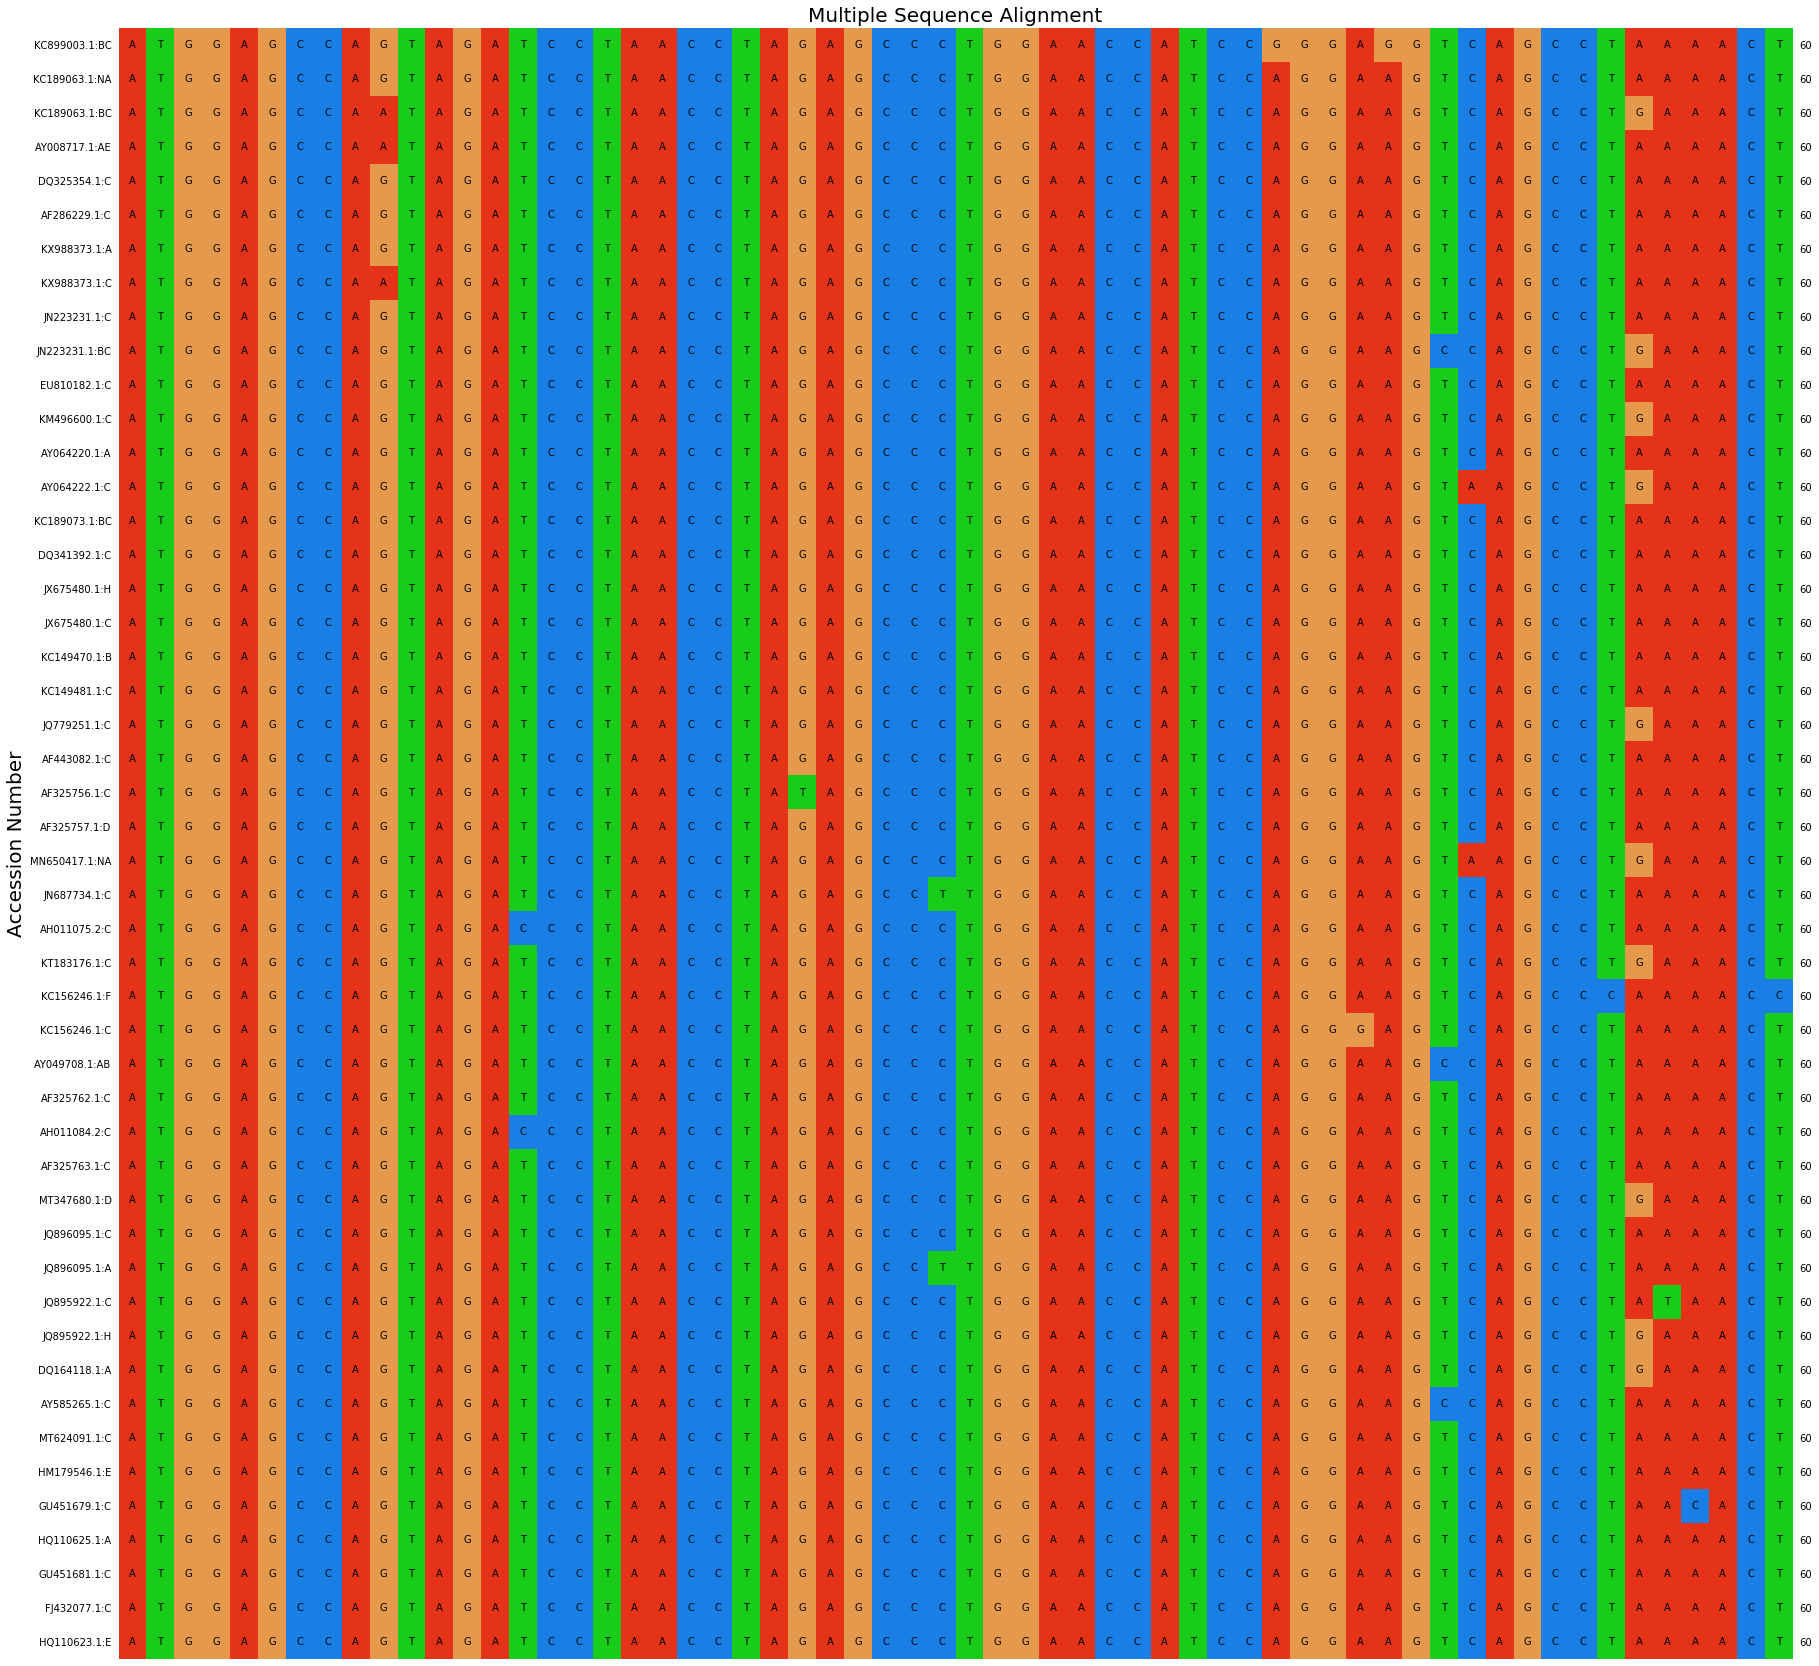

In [3]:
#For better visualization of the alignment, we can use colors to see which nucleotides are conserved. 
#this can't display long sequences we have to use an index to get the MSA of the first 50 nucleotides
alignment_2=alignment[:60,order] 

#indicate the axis and adjust plot size
fig = plt.figure(figsize=(30.0,30.0))
ax = fig.add_subplot(111)

#plotting the alignment
graphics.plot_alignment_type_based(ax, alignment_2, show_numbers=True,spacing=1.0,labels=ID,color_scheme="clustalx",symbols_per_line=len(alignment_2))

#set titles and the fontsize
ax.set_title("Multiple Sequence Alignment",fontsize=20)
ax.set_ylabel("Accession Number", fontsize=20)

plt.show()      

ValueError: Alphabets of the sequences in the alignment are not equal

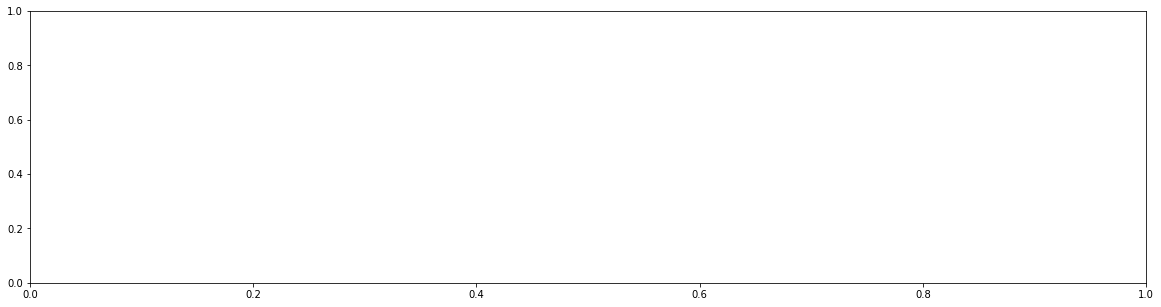

In [6]:
#create a motif
#indicate the axis and adjust plot size
fig = plt.figure(figsize=(20,5.0))
ax = fig.add_subplot(111)

#plot the motif
graphics.plot_sequence_logo(ax,alignment[:40],scheme="clustalx")

# add x and y axis with labels
ax.set_title("Motif",fontsize=25)
ax.set_xlabel("Nucleotide position",fontsize=20)
ax.set_xticks([10,20,30,40,50])
ax.set_ylabel("Bits")

#remove the top and right frame of the plot
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
fig.tight_layout()

plt.show()  

In [7]:
#phylogenetic tree
import pandas as pd
#show distance matrix for phylogeny tree
print(pd.DataFrame(distances))   

          0         1         2         3         4         5         6   \
0   0.000000  0.031735  0.031776  0.038267  0.025336  0.053081  0.046515   
1   0.031735  0.000000  0.051295  0.064587  0.047741  0.066295  0.059652   
2   0.031776  0.051295  0.000000  0.064653  0.051364  0.077304  0.073078   
3   0.038267  0.064587  0.064653  0.000000  0.038288  0.079874  0.079883   
4   0.025336  0.047741  0.051364  0.038288  0.000000  0.059728  0.053113   
5   0.053081  0.066295  0.077304  0.079874  0.059728  0.000000  0.044616   
6   0.046515  0.059652  0.073078  0.079883  0.053113  0.044616  0.000000   
7   0.025336  0.044743  0.044794  0.064669  0.038269  0.053113  0.046546   
8   0.038280  0.057934  0.058021  0.058043  0.044825  0.073129  0.066420   
9   0.057967  0.071266  0.068961  0.078155  0.064661  0.040047  0.053148   
10  0.044761  0.057896  0.071311  0.078110  0.051355  0.033537  0.040022   
11  0.025322  0.044715  0.057937  0.051355  0.025335  0.053081  0.059687   
12  0.044711

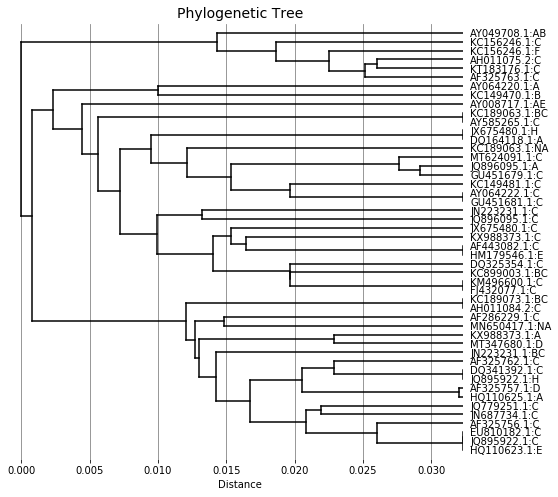

In [8]:
#based on the distance matrix that was calculated, plot the dendrogram with the UPGMA algorithm
tree = phylo.upgma(distances)

#indicate the axis and adjust plot size
fig = plt.figure(figsize=(8.0, 8.0))
ax = fig.add_subplot(111)

#plot the phylogenetic tree
graphics.plot_dendrogram(ax,guide_tree,orientation="left",show_distance=True,labels=ID)

#create labels for the plot
ax.set_title("Phylogenetic Tree",fontsize=14)
ax.set_xlabel("Distance")

#make the grid gray to visualize the distances a little bit better
ax.xaxis.grid(color="gray")
plt.show()   

In [9]:
#HMM
#build the HMM for the basic data set

#first we are going to parse the training fasta file to get the sequences and then format them for the HMM model
#[["A","T","G","C","T","G","A"]
#["T","G","A","T","G","A","A"]]  #<-----sequences must be in this format for the hmm to work!

#Get the fasta file from local environment
file_path ='/Users/claudia/Desktop/123b_project/basic_training-HMM.fasta'
fasta_file = fasta.FastaFile.read(file_path)

sequences=[]
title=[]
for header, string in fasta_file.items():
    sequences.append(seq.NucleotideSequence(string))
    title.append(header.split(' ')[0]) 
        
#create an array from the sequences        
seq_array=np.array(sequences,dtype=object)

#intializing the model 
state_names=["I","M","D"]

#starting dist. 
#since we dont know the distributions in a match state, we will first put .25 for each nucleotide
#then we will pick the first sequence and fit the distribution and update the percentages
m_dist=DiscreteDistribution({ "A":.25, 'C': .25, 'G': .25, 'T': .25 })
m_dist.fit(sequences[1])
m_dist.fit(sequences[2])
m_dist.fit(sequences[3])
M=State(m_dist,name="M")

#insert state dist.
I=State(DiscreteDistribution({'A': 0.25, 'C': 0.25, 'G': 0.25, 'T': 0.25 }),name="I")

#deletion state
#deletions do not have emissions so the transition matrix=none
D=State(None, name="D")

#using from_samples() learns the transitions/emmission/start probabilities from the sequence array
# sequence of observations and know the number of hidden states is known
#n_components indicates the number of hidden states
#X=input data sequences
#set algorithm to viterbi
model = HiddenMarkovModel.from_samples(DiscreteDistribution,n_components=3, X=seq_array,
                                       algorithm="viterbi",use_pseudocount=True)#,state_names=state_names)

#add states match, insert, and deletion states
model.add_states([M,I,D])

#fit the model
#verbose=T gives the stats on the model training
model.fit(seq_array,verbose=True,algorithm="viterbi",max_iterations=100)

#bake finalizes the model
model.bake()
print("\nHMM model done training")   

[1] Improvement: 1.3112761224510905	Time (s): 0.00858
[2] Improvement: 0.0	Time (s): 0.004871
Total Training Improvement: 1.3112761224510905
Total Training Time (s): 0.0214

HMM model done training


In [6]:
#lets view some information and see how the model trained
print(model)
#transition matrix
print("\nTransition matrix")
print(model.dense_transition_matrix())   

None:{
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "dtype" : "str",
        "name" : "DiscreteDistribution",
        "parameters" : [
            {
                "A" : 0.5899915895710681,
                "C" : 0.0,
                "G" : 0.0,
                "T" : 0.4100084104289319
            }
        ],
        "frozen" : false
    },
    "name" : "s0",
    "weight" : 1.0
}{
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "dtype" : "str",
        "name" : "DiscreteDistribution",
        "parameters" : [
            {
                "A" : 0.0,
                "C" : 0.5098855359001041,
                "G" : 0.49011446409989595,
                "T" : 0.0
            }
        ],
        "frozen" : false
    },
    "name" : "s1",
    "weight" : 1.0
}{
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "dtype" : "str",
        "name" : "DiscreteDistribution",
      

In [14]:
#viterbi scores for the basic training set
for (i,j) in zip(seq_array,title):  
    print("\nAccession number:",j)
    print("viterbi score:",model.log_probability(i))


Accession number: DQ325354.1:1-214
viterbi score: -291.62580237382565

Accession number: HQ110625.1:1-215
viterbi score: -289.46282563849616

Accession number: GU451679.1:1-215
viterbi score: -289.68111964621795

Accession number: GU451681.1:1-215
viterbi score: -288.67400214493784

Accession number: FJ432077.1:1-215
viterbi score: -290.83753503845367

Accession number: HQ110623.1:1-215
viterbi score: -290.8278511763481

Accession number: EU810182.1:1-215
viterbi score: -289.7333462369834

Accession number: JX675480.1:1-215
viterbi score: -289.2489387768388

Accession number: HM179546.1:1-216
viterbi score: -289.12442406105623

Accession number: AY064220.1:1-216
viterbi score: -290.0496442401474

Accession number: MT624091.1:1-215
viterbi score: -289.27528938079394

Accession number: AH011075.2:1-215
viterbi score: -291.2928307527044

Accession number: AH011084.2:1-215
viterbi score: -289.0970281742014

Accession number: KC189063.1:122-336
viterbi score: -290.5573034416645

Accession 

In [9]:
#basic test sequences         
#Get the fasta file from local environment
file_path ='/Users/claudia/Desktop/123b_project/basic_test_HMM.fasta'
fasta_file = fasta.FastaFile.read(file_path)

b_title=[]
b_sequences=[]
for header, string in fasta_file.items():
    b_sequences.append(seq.NucleotideSequence(string))
    b_title.append(header.split(' ')[0]) 
        
#compute viterbi scores for basic test        
for (i,j) in zip(b_sequences,b_title): 
    print("\nAccession number:",j)
    print("viterbi score:",model.log_probability(i))  


Accession number: KX988373.1:2509-2723


ValueError: Symbol 'R' is not defined in a distribution

viterbi score: 0.0

Accession number: KC156246.1:907-1121
viterbi score: -294.1191182246925

Accession number: KC149470.1:907-1121
viterbi score: -294.9545350145748

Accession number: KC899003.1:925-1139
viterbi score: -294.62749094914534

Accession number: MN650417.1:5038-5252
viterbi score: -294.545735601556


Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel.log_probability'
Traceback (most recent call last):
  File "pomegranate/hmm.pyx", line 93, in pomegranate.hmm._check_input
ValueError: Symbol 'R' is not defined in a distribution


In [11]:
#HMM for the training the related set
# we will use the same exact parameters as the basic set
file_path ='/Users/claudia/Desktop/123b_project/related_training.fasta'
fasta_file = fasta.FastaFile.read(file_path)

r_training_title=[]
r_training_sequences=[]
for header, string in fasta_file.items():
    r_training_sequences.append(seq.NucleotideSequence(string))
    r_training_title.append(header.split(' ')[0]) 
        
#create an array from the sequences        
seq_array_r=np.array(r_training_sequences,dtype=object)

#intializing the model 
state_names=["M","I","D"]

#starting dist. 
#since we dont know the distributions in a match state, we will first put .25 for each nucleotide
#then we will pick the first sequence and fit the distribution and update the percentages
m_dist=DiscreteDistribution({ "A":.25, 'C': .25, 'G': .25, 'T': .25 })
m_dist.fit(sequences[1])
m_dist.fit(sequences[2])
m_dist.fit(sequences[3])
M=State(m_dist,name="M")

#insert state dist.
I=State(DiscreteDistribution({'A': 0.25, 'C': 0.25, 'G': 0.25, 'T': 0.25 }),name="I")

#deletion state
#deletions do not have emissions so the transition matrix=none
D=State(None, name="D")

#using from_samples() learns the transitions/emmission/start probabilities from the sequence array
# sequence of observations and know the number of hidden states is known
#n_components indicates the number of hidden states
#X=input data sequences
# use viterbi for the algorithm
model = HiddenMarkovModel.from_samples(DiscreteDistribution,n_components=3, X=seq_array_r,
                                       algorithm="viterbi",use_pseudocount=True)#,state_names=state_names)

model.add_states([M,I,D])

#fit the model
# setting verbose as T gives the stats on the model training
model.fit(seq_array_r,verbose=True,algorithm="viterbi",max_iterations=100)

#bake finalizes the model
model.bake()
print("\nHMM model done training")   

[1] Improvement: 0.6454064802346693	Time (s): 0.006875
[2] Improvement: 0.0	Time (s): 0.006338
Total Training Improvement: 0.6454064802346693
Total Training Time (s): 0.0192

HMM model done training


In [11]:
#get the information on how the related HMM trained
print(model)
print("\nTransition matrix")
print(model.dense_transition_matrix()) #225

None:{
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "dtype" : "str",
        "name" : "DiscreteDistribution",
        "parameters" : [
            {
                "A" : 0.0,
                "C" : 0.0,
                "G" : 0.9989517819706499,
                "M" : 0.0,
                "R" : 0.0,
                "T" : 0.0,
                "Y" : 0.0010482180293501049
            }
        ],
        "frozen" : false
    },
    "name" : "s0",
    "weight" : 1.0
}{
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "dtype" : "str",
        "name" : "DiscreteDistribution",
        "parameters" : [
            {
                "A" : 0.0,
                "C" : 1.0,
                "G" : 0.0,
                "M" : 0.0,
                "R" : 0.0,
                "T" : 0.0,
                "Y" : 0.0
            }
        ],
        "frozen" : false
    },
    "name" : "s1",
    "weight" : 1.0
}{
    "class" : "Sta

In [12]:
#viterbi scores for the related training set
for (i,j) in zip(seq_array_r,r_training_title):  
    print("\nAccession number:",j)
    print("viterbi score:",model.log_probability(i))  


Accession number: DQ341392.1:1-216
viterbi score: -291.03586931305415

Accession number: AY064222.1:1-216
viterbi score: -290.9705941696753

Accession number: MN650417.1:5038-5252
viterbi score: -289.6347589530608

Accession number: KT183176.1:5044-5258
viterbi score: -291.3326647674959

Accession number: KM496600.1:37-251
viterbi score: -289.421980353109

Accession number: KC189063.1:122-336
viterbi score: -290.5573034416645

Accession number: KC149481.1:907-1121
viterbi score: -291.4647640672691

Accession number: MT624091.1:1-215
viterbi score: -289.27528938079394

Accession number: KC156246.1:907-1121
viterbi score: -288.5656252873698

Accession number: JX675480.1:1-215
viterbi score: -289.2489387768388

Accession number: JN223231.1:157-371
viterbi score: -290.6144805674861

Accession number: JQ896095.1:790-1004
viterbi score: -293.30273718454373

Accession number: JN687734.1:1269-1483
viterbi score: -290.13110670411317

Accession number: AY585265.1:5214-5428
viterbi score: -288.8

In [13]:
#running the related test sequences with the HMM
#get the sequences and accession numbers
file_path ='/Users/claudia/Desktop/123b_project/related_testing.fasta'
fasta_file = fasta.FastaFile.read(file_path)

#store accession number and the sequence  to input into the HMM model
related_test_names=[]
related_test_seq=[]
for header, string in fasta_file.items():
    related_test_seq.append(seq.NucleotideSequence(string))
    related_test_names.append(header.split(' ')[0]) 
        
#compute viterbi scores for related test set        
for i,j in zip(related_test_seq,related_test_names):
    print("Accession Number:",j)
    print("viterbi score:",model.log_probability(i))  

Accession Number: JQ779251.1:907-1121
viterbi score: -291.7325575361215
Accession Number: MT347680.1:5222-5436
viterbi score: -290.5216650174051
Accession Number: JQ895922.1:790-1004
viterbi score: -291.8855764004644
Accession Number: DQ164118.1:5238-5452
viterbi score: -290.80515559316206
Accession Number: AF443082.1:5170-5384
viterbi score: -291.61778293161206
